In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='w'

from numba import njit

In [3]:
#Setting the initial conditions for the simulation 
# k = spring constant, m=mass, gamma=damping factor, Tf=final time, dt=time step, Trials = number of particles
trials = 400
k = 0
m = 10e-4
gamma = 0.5*1.275*np.pi*10e-8*0.445
Tf = 500
dt = 0.1
N = int(Tf/dt)
BrownianF = 0.1

In [4]:
@njit
#Defining the rk4 integration
#X0 = initial position, V0=initial velocity, direction=vertical or horizontal, BrownianF= the magnitude of brownian force applied to the particle.
#bound = the boundary condition
def rk4bound(X0, V0, direction, BrownianF, Tf, bound):
#     Tf=200; dt=0.1; gamma=0.2; k=1; m=1
    N = np.int(Tf/dt)
    X = np.zeros(N, np.float32)
    V = np.zeros(N, np.float32)
    T = np.zeros(N, np.float32)
    
    X[0] = X0
    V[0] = V0
    
    if direction=="x":
        F = np.random.normal(0, BrownianF, size=N)
    elif direction=="y":
        F = np.full(N, -9.81*m) + np.random.normal(0, BrownianF, size = N)
    else:
        raise ValueError("Direction must be x or y")
    
    def acc(x, v, F):
        return ((-gamma*v*v) - ((k/m)*x) + F)
    
    for n in range (1, N):
        T[n] = n*dt
        x0 = X[n-1]
        v0 = V[n-1]
        h = dt
        
        k1x = v0
        k1v = acc(x0, v0, F[n-1])
        k2x = v0 + (k1v*h/2)
        k2v = acc((x0 + (k1x*h/2)), (v0 + (k1v*h/2)), F[n-1])
        k3x = v0 + (k2v*h/2)
        k3v = acc((x0 + (k2x*h/2)), (v0 + (k2v*h/2)), F[n-1])
        k4x = v0 + (k3v*h)
        k4v = acc(x0 + (k3x*h), v0 + (k3v*h), F[n-1])
        
        X[n] = x0 + (dt*(k1x + 2*k2x + 2*k3x + k4x)/6)
        V[n] = v0 + (dt*(k1v + 2*k2v + 2*k3v + k4v)/6)
        
        if direction=="x":
            if (X[n]>bound):
                X[n] = -bound
            elif (X[n]< -bound):
                X[n] = bound
    
    return T, X, V

In [5]:
from decimal import *
getcontext().prec = 2

In [6]:
%%time
#Simulating the trajectories of 400 particles, with initial positions randomly generated.
#The boundary condition is imposed here.

boundary = 100

X_val = np.zeros(shape=(trials, N))
Xsqr_val = np.zeros(shape=(trials, N))
Vx_val = np.zeros(shape=(trials, N))
Vxsqr_val = np.zeros(shape=(trials, N))

Y_val = np.zeros(shape=(trials, N))
Ysqr_val = np.zeros(shape=(trials, N))
Vy_val = np.zeros(shape=(trials, N))
Vysqr_val = np.zeros(shape=(trials, N))

for i in range (0, trials):
#     s = Decimal(i/20)
#     w, d = divmod(s, 1)
#     xstart = int(w)
#     ystart = int(d*20)
    xstart = np.random.uniform(-boundary, boundary)
    ystart = np.random.uniform(-boundary, boundary)

    tr, xr, vxr = rk4bound(xstart, 0, direction="x", BrownianF=0.01, Tf=500,bound=boundary)
    X_val[i] = xr
    Vx_val[i] = vxr
    Xsqr_val[i] = np.square(xr)
    Vxsqr_val[i] = np.square(vxr)
    

    tr, yr, vyr = rk4bound(ystart, 0, direction="y", BrownianF=0.01, Tf=500,bound=boundary)
    Y_val[i] = yr
    Vy_val[i] = vyr
    Ysqr_val[i] = np.square(yr)
    Vysqr_val[i] = np.square(vyr)
#     C = np.multiply(vr, F)
    
X_avg = np.sum(X_val, axis=0) / trials
Xsqr_avg = np.sum(Xsqr_val, axis=0) / trials
Vx_avg = np.sum(Vx_val, axis=0) / trials
Vxsqr_avg = np.sum(Vxsqr_val, axis=0) / trials
Y_avg = np.sum(Y_val, axis=0) / trials
Ysqr_avg = np.sum(Ysqr_val, axis=0) / trials
Vy_avg = np.sum(Vy_val, axis=0) / trials
Vysqr_avg = np.sum(Vysqr_val, axis=0) / trials
# C = np.sum(C, axis=0) / trials

CPU times: user 1.78 s, sys: 119 ms, total: 1.9 s
Wall time: 2.15 s


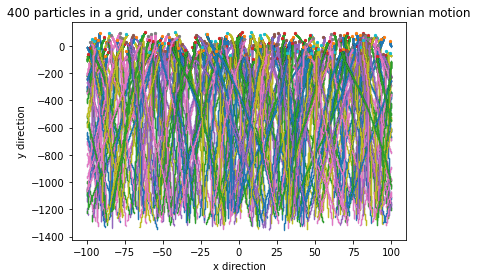

CPU times: user 7.1 s, sys: 52.4 ms, total: 7.15 s
Wall time: 7.17 s


In [8]:
%%time
#Plotting the trajectories of the 400 particles over time
for i in range(0, trials):
    plt.scatter(X_val[i], Y_val[i], s=0.01)
    plt.scatter(X_val[i][0], Y_val[i][0], s=5)

plt.xlabel("x direction")
plt.ylabel("y direction")
plt.title("400 particles in a grid, under constant downward force and brownian motion")
plt.show()

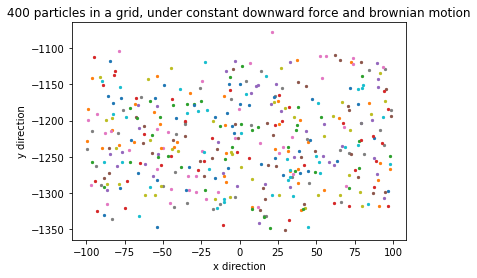

CPU times: user 3.3 s, sys: 17.4 ms, total: 3.32 s
Wall time: 3.32 s


In [9]:
%%time
#Plotting the initial and final positions of each of the 400 particles
for i in range(0, trials):
    #plt.scatter(X_val[i][0], Y_val[i][0], s=5)
    plt.scatter(X_val[i][N-1], Y_val[i][N-1], s=5)

plt.xlabel("x direction")
plt.ylabel("y direction")
plt.title("400 particles in a grid, under constant downward force and brownian motion")
plt.show()

400


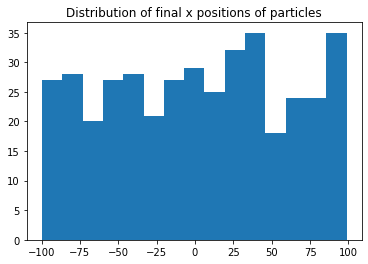

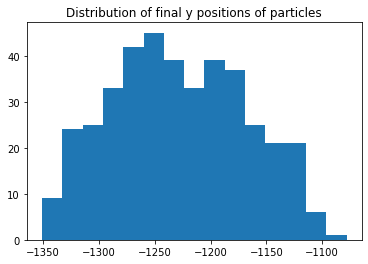

[-60 -50 -40 -30 -20 -10   0  10  20  30  40  50  60]
[24 18 16 18 19 27 17 18 26 28 18 13] [-60 -50 -40 -30 -20 -10   0  10  20  30  40  50  60]


In [10]:
#Plotting the final distribution of the particles across the x- and y-axis
Finalposx = np.zeros(trials, float)
Finalposy = np.zeros(trials, float)
for i in range(0, trials):
    Finalposx[i] = X_val[i][N-1]
    Finalposy[i] = Y_val[i][N-1]
    
print(len(Finalposx))

plt.hist(Finalposx, bins=15);
plt.title("Distribution of final x positions of particles")
plt.show()
plt.hist(Finalposy, bins=15);
plt.title("Distribution of final y positions of particles")
plt.show()

divide = np.arange(-60, 70, 10)
print(divide)
counts, bins = np.histogram(Finalposx, bins=divide)
print(counts, bins)

In [11]:
#Calculating the standard deviation for the spread of the final positions of 400 particles
varx = np.mean(np.square(Finalposx)) - (np.mean(Finalposx)**2)
sdx = np.sqrt(varx)
vary = np.mean(np.square(Finalposy)) - (np.mean(Finalposy)**2)
sdy = np.sqrt(vary)

print("Standard deviation for the final spread of particles in x-axis= ", sdx)
print("Standard deviation for the final spread of particles in y-axis= ", sdy)

Standard deviation for the final spread of particles in x-axis=  57.58245497778042
Standard deviation for the final spread of particles in y-axis=  59.9613611615871


In [12]:
#Getting the y-axis profile of the 400 particles over time
#Each column represents a moment in time, each row represents successive ranges of y-values grouped in 'bands'
#The numbers represent the number of particles in that band, at that point in time.

store=[]
yband=np.arange(-1300, 200, 20)
print(len(yband))
distribute= np.zeros(shape=(74, 10))

# coord=[]
# for p in range(0,400):
#     coord.append(tuple(zip(X_val[p],Y_val[p])))

#print(coord[0])
# for i in coord:
#     for j in i:
#         if j[1]<-700 and j[1]>-800: #and i[0]>-10 and i[0]<10:
#             store.append(j)

for i in range(0, 5000, 500):
    counts, bins = np.histogram(Y_val[:,i], bins=yband)
    l = int((i/500)) 
#     column= bins[1:31]
#     distribute[:,1]= column[::-1]
    distribute[:,l]= counts[::-1]
    
print(distribute)

75
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [32. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [30. 34.  0.  0.  0.  0.  0.  0.  0.  0.]
 [42. 33. 16.  0.  0.  0.  0.  0.  0.  0.]
 [37. 39. 34.  0.  0.  0.  0.  0.  0.  0.]
 [49. 46. 32.  0.  0.  0.  0.  0.  0.  0.]
 [42. 44. 40. 16.  0.  0.  0.  0.  0.  0.]
 [39. 43. 48. 31.  0.  0.  0.  0.  0.  0.]
 [55. 44. 41. 32.  0.  0.  0.  0.  0.  0.]
 [34. 49. 45. 38.  0.  0.  0.  0.  0.  0.]
 [40. 26. 49. 51.  5.  0.  0.  0.  0.  0.]
 [ 0. 32. 41. 41. 29.  0.  0.  0.  0.  0.]
 [ 0.  0. 30. 45. 34.  0.  0.  0.  0.  0.]
 [ 0.  0. 24. 44. 42.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 45. 49.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 28. 37.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 29. 44. 26.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 43. 29.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 52. 35.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 28. 40.  0.  0.  0.  0.]
 [ 0.  0

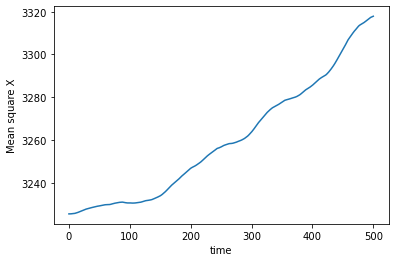

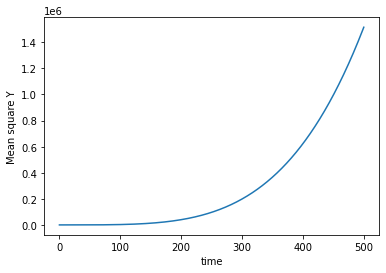

In [15]:
#Plot of the mean squared displacement and mean squared velocity over time

plt.plot(tr, Xsqr_avg)
plt.xlabel("time")
plt.ylabel("Mean square X")
plt.show()
plt.plot(tr, Ysqr_avg)
plt.xlabel("time")
plt.ylabel("Mean square Y")
plt.show()

## How Standard deviation varies with mean brownian force

In [16]:
%%time

# Here, we vary the standard deviation of the brownian force applied to the particles, and observe how the standard deviation of the y-axis spread varies
sigmax = np.zeros(20, float)
sigmay = np.zeros(20, float)

for l in range(0, 20):
    X_val = np.zeros(shape=(trials, N))
    Xsqr_val = np.zeros(shape=(trials, N))
    Vx_val = np.zeros(shape=(trials, N))
    Vxsqr_val = np.zeros(shape=(trials, N))
    
    Y_val = np.zeros(shape=(trials, N))
    Ysqr_val = np.zeros(shape=(trials, N))
    Vy_val = np.zeros(shape=(trials, N))
    Vysqr_val = np.zeros(shape=(trials, N))
    
    BrownianF = 0.1*l
    
    for i in range (0, trials):
    #     s = Decimal(i/20)
    #     w, d = divmod(s, 1)
    #     xstart = int(w)
    #     ystart = int(d*20)
        xstart = np.random.uniform(-10, 10)
        ystart = np.random.uniform(-10, 10)
    
        tr, xr, vxr = rk4bound(xstart, 0, direction="x", BrownianF=0.01*l, Tf=500, bound=boundary)
        X_val[i] = xr
        Vx_val[i] = vxr
        Xsqr_val[i] = np.square(xr)
        Vxsqr_val[i] = np.square(vxr)
        
    
        tr, yr, vyr = rk4bound(ystart, 0, direction="y", BrownianF=0.01*l, Tf=500, bound=boundary)
        Y_val[i] = yr
        Vy_val[i] = vyr
        Ysqr_val[i] = np.square(yr)
        Vysqr_val[i] = np.square(vyr)
        
    Finalposx = np.zeros(trials, float)
    Finalposy = np.zeros(trials, float)
    for i in range(0, trials):
        Finalposx[i] = X_val[i][N-1]
        Finalposy[i] = Y_val[i][N-1]
        
    varx = np.mean(np.square(Finalposx)) - (np.mean(Finalposx)**2)
    sigmax[l] = np.sqrt(varx)
    vary = np.mean(np.square(Finalposy)) - (np.mean(Finalposy)**2)
    sigmay[l] = np.sqrt(vary)
    

CPU times: user 5.71 s, sys: 161 ms, total: 5.87 s
Wall time: 5.88 s


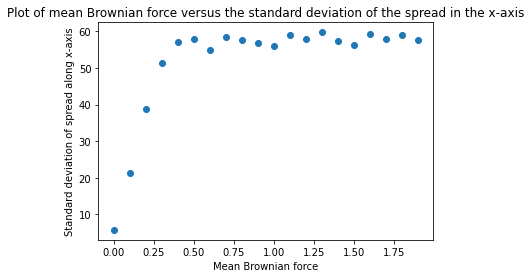

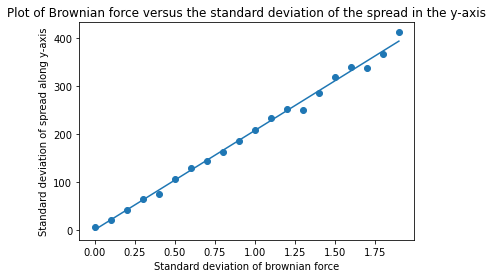

In [18]:
#Plotting the standard deviation of final y-axis spread vs. the standard deviation of the brownian force

l = np.arange(0, 2, 0.1)

m2, c2 = np.polyfit(l, sigmay, 1)

plt.scatter(l, sigmax)
plt.title("Plot of mean Brownian force versus the standard deviation of the spread in the x-axis")
plt.xlabel("Mean Brownian force")
plt.ylabel("Standard deviation of spread along x-axis")
plt.show()
plt.scatter(l, sigmay)
plt.plot(l, l*m2 + c2)
plt.title("Plot of Brownian force versus the standard deviation of the spread in the y-axis")
plt.xlabel("Standard deviation of brownian force")
plt.ylabel("Standard deviation of spread along y-axis")
plt.show()